# Bike Thefts Berlin - EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH = '../data'

In [3]:
time_parseable = ['start_date_delict', 'end_date_delict', 'start_time_delict', 'end_time_delict']

## Prep data inspection

In [4]:
class BikeThefts():
    '''Read, inspect and transform initial data.'''

    def __init__(self, path = PATH) -> None:
        self.path = path

    def read_data(self, file) -> pd.DataFrame:
        '''Return DataFrame with feature matrix and labels as values.'''
        df = pd.read_csv(f'{self.path}/{file}.csv', index_col=0, parse_dates=True, encoding = 'unicode_escape')
        return df
    
    def check_unique(self, serie) -> pd.Series:
        '''Return unique values of selected columns.'''
        return serie.unique()

    def include_timestamps(self, df) -> pd.DataFrame:
        '''Return DataFrame with time-stamps.'''
        df['hour'] = df.index.hour
        df['day'] = df.index.day
        df['week_day'] = df.index.weekday
        df['week'] = df.index.week
        df['year'] = df.index.year
        df['month'] = df.index.month
        return df

    def time_parser(self, df, time_parsables) -> pd.DataFrame:
        '''Parse columns encoded as strings to datetime-objects.'''
        for col in time_parsables:
            df[col] = pd.to_datetime(df[col])
        return df

    def crime_duration_days(self, df, start, end) -> pd.DataFrame: #use for plotting?
        '''Calculate duration of crime in days.'''
        df['crime_duration_days'] = end - start
        return df
    
    def crime_duration_hours(self, df, start, end) -> pd.DataFrame: #use for plotting?
        '''Calculate duration of crime in hours.'''
        df['crime_duration_hours'] = abs(start - end)
        return df
    
    def fill_ints(self, df) -> pd.DataFrame:
        '''Reencode LOR into 8-digit values.'''
        df['LOR'] = df['LOR'].apply(lambda x: str(x))
        df['LOR'] = df['LOR'].apply(lambda x: f'0{(x)}'[-8:])
        return df

    def thefts_count(self, df, frequency) -> pd.DataFrame:
        '''Calculate average thefts per time-frequency.'''
        df_filled = pd.DataFrame(df.groupby(frequency).size(),
                          columns=[f'{frequency}_thefts_count']).reset_index()
        return df_filled
    
    def mean_thefts(self, df, frequency) -> pd.DataFrame:
        '''Calculate average thefts per time-frequency.'''
        df_filled = pd.DataFrame(df.groupby(frequency).mean(),
                          columns=[f'{frequency}_average_thefts']).reset_index()
        return df_filled
      
    def rename_cols(self, df) -> pd.DataFrame:
        return df.rename(columns={ 
            'ANGELEGT_AM' : 'track_date',
            'TATZEIT_ANFANG_DATUM' : 'start_date_delict',
            'TATZEIT_ANFANG_STUNDE' : 'start_time_delict',
            'TATZEIT_ENDE_DATUM' : 'end_date_delict',
            'TATZEIT_ENDE_STUNDE' : 'end_time_delict',
            'SCHADENSHOEHE' : 'damage_amount',
            'VERSUCH' : 'intent_delict',
            'ART_DES_FAHRRADS' : 'bike_type',
            'DELIKT' : 'delict',
            'ERFASSUNGSGRUND' : 'description'
            })
    
    def save_intermediate_data(self, df, file: str):
        '''Save extracted data locally as csv-file.'''
        return df.to_csv(f'{self.path}/{file}.csv')

    def save_LOR_bike_thefts(self, df, group_by: str, col_names: str, file: str):
        '''Save extracted LOR-bike thefts-data locally as csv-file.'''
        bike_thefts_LOR = pd.DataFrame(df.groupby(group_by).size(),
                        columns = [col_names]).reset_index()
        return bike_thefts_LOR.to_csv(f'{self.path}/{file}.csv')

In [5]:
class PlotBikeThefts():
    '''Plot data with seaborn.'''

    def plot_categoricals(self, df, ordinate) -> sns:
            return sns.catplot(
            data=df, y=ordinate, kind="count",
            palette="pastel", edgecolor=".6",
        )

    def plot_correlations(self, df) -> sns:
        corr = df.corr()
        mask = np.triu(np.ones_like(corr, dtype=bool))
        f, ax = plt.subplots(figsize=(8, 6))
        plt.xticks(rotation=45)
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        return sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5})
    

## Inspect

In [6]:
bike_thefts = BikeThefts()

In [7]:
df = bike_thefts.read_data('Fahrraddiebstahl')
df.head()

,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
ANGELEGT_AM,,,,,,,,,,
2023-02-19,18.02.2023,18,19.02.2023,7,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,18.02.2023,20,19.02.2023,9,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,18.02.2023,16,19.02.2023,0,6100102,746,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,18.02.2023,17,19.02.2023,0,7601544,1849,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,17.02.2023,17,17.02.2023,17,3601346,1863,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [8]:
df.resample('D').size()

ANGELEGT_AM
2022-01-01     4
2022-01-02    38
2022-01-03    46
2022-01-04    48
2022-01-05    63
              ..
2023-11-28     0
2023-11-29     0
2023-11-30     0
2023-12-01    47
2023-12-02    41
Freq: D, Length: 701, dtype: int64

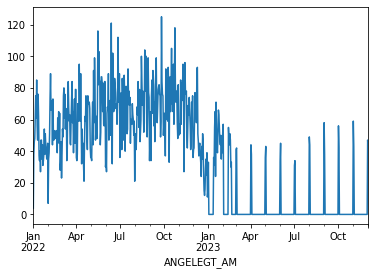

In [9]:
df.resample('D').size().plot.line();

In [10]:
daily_thefts = df.loc['2022-01-02':'2023-02-19'].resample('D').size()
daily_thefts

ANGELEGT_AM
2022-01-02    38
2022-01-03    46
2022-01-04    48
2022-01-05    63
2022-01-06    75
              ..
2023-02-15    44
2023-02-16    51
2023-02-17    47
2023-02-18    30
2023-02-19    33
Freq: D, Length: 414, dtype: int64

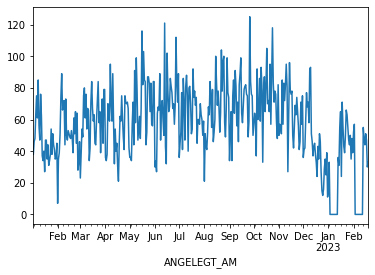

In [11]:
daily_thefts.plot.line();

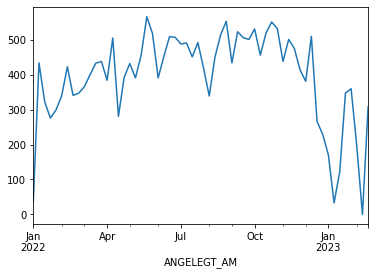

In [12]:
df.loc['2022-01-02':'2023-02-19'].resample('W').size().plot.line();

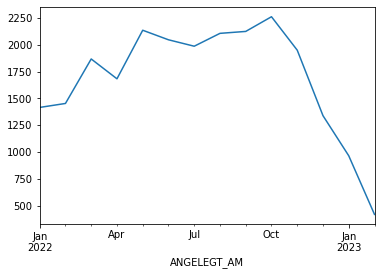

In [13]:
df.loc['2022-01-02':'2023-02-19'].resample('M').size().plot.line();

In [14]:
df.info() # dates are encoded as strings

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24610 entries, 2023-02-19 to 2022-01-01
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TATZEIT_ANFANG_DATUM   24610 non-null  object
 1   TATZEIT_ANFANG_STUNDE  24610 non-null  int64 
 2   TATZEIT_ENDE_DATUM     24610 non-null  object
 3   TATZEIT_ENDE_STUNDE    24610 non-null  int64 
 4   LOR                    24610 non-null  int64 
 5   SCHADENSHOEHE          24610 non-null  int64 
 6   VERSUCH                24610 non-null  object
 7   ART_DES_FAHRRADS       24610 non-null  object
 8   DELIKT                 24610 non-null  object
 9   ERFASSUNGSGRUND        24610 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.1+ MB


In [15]:
df.shape

(24610, 10)

In [16]:
df.isna().sum().sum()

0

In [17]:
bike_thefts.check_unique(df['DELIKT'])

array(['Fahrraddiebstahl', 'Keller- und Bodeneinbruch'], dtype=object)

In [18]:
bike_thefts.check_unique(df['ART_DES_FAHRRADS'])

array(['Herrenfahrrad', 'Damenfahrrad', 'Mountainbike',
       'diverse Fahrräder', 'Fahrrad', 'Kinderfahrrad', 'Rennrad',
       'Lastenfahrrad'], dtype=object)

In [19]:
len(bike_thefts.check_unique(df['LOR']))

540

In [20]:
bike_thefts.check_unique(df['VERSUCH']) 

array(['Nein', 'Unbekannt', 'Ja'], dtype=object)

In [21]:
len(df[df['VERSUCH']== 'Unbekannt']) # decision: include or drop?

5

In [22]:
bike_thefts.check_unique(df['ERFASSUNGSGRUND'])

array(['Sonstiger schwerer Diebstahl von Fahrrädern',
       'Einfacher Diebstahl von Fahrrädern',
       'Sonstiger schwerer Diebstahl in/aus Keller/Boden von Fahrrädern',
       'Einfacher Diebstahl aus Keller/Boden von Fahrrädern'],
      dtype=object)

In [23]:
df = bike_thefts.rename_cols(df)
df.columns

Index(['start_date_delict', 'start_time_delict', 'end_date_delict',
       'end_time_delict', 'LOR', 'damage_amount', 'intent_delict', 'bike_type',
       'delict', 'description'],
      dtype='object')

## Parse time

In [24]:
df_transformed = bike_thefts.time_parser(df, time_parseable)
df_transformed.head(3)

,start_date_delict,start_time_delict,end_date_delict,end_time_delict,LOR,damage_amount,intent_delict,bike_type,delict,description
ANGELEGT_AM,,,,,,,,,,
2023-02-19,2023-02-18,1970-01-01 00:00:00.000000018,2023-02-19,1970-01-01 00:00:00.000000007,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,2023-02-18,1970-01-01 00:00:00.000000020,2023-02-19,1970-01-01 00:00:00.000000009,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,2023-02-18,1970-01-01 00:00:00.000000016,2023-02-19,1970-01-01 00:00:00.000000000,6100102,746,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [25]:
# df_transformed['diff_days'] = (df_transformed['end_date_delict'] - df_transformed['start_date_delict']) / np.timedelta64(1, 'D')
# df_transformed.diff_days.unique()

In [26]:
# start_time = df_transformed['start_time_delict']
# end_time = df_transformed['end_time_delict']
# diff = end_time - start_time
# df_transformed['diff_hours'] = diff.total_seconds()/ 3600
# df_transformed.diff_days.unique()

In [27]:
df_transformed = bike_thefts.crime_duration_days(df_transformed, 
                                            start=df_transformed['start_date_delict'], 
                                            end = df_transformed['end_date_delict'])

In [28]:
df_transformed = bike_thefts.crime_duration_hours(df_transformed, 
                                            start=df_transformed['start_time_delict'], 
                                            end = df_transformed['end_time_delict'])
df_transformed.head(2)

,start_date_delict,start_time_delict,end_date_delict,end_time_delict,LOR,damage_amount,intent_delict,bike_type,delict,description,crime_duration_days,crime_duration_hours
ANGELEGT_AM,,,,,,,,,,,,
2023-02-19,2023-02-18,1970-01-01 00:00:00.000000018,2023-02-19,1970-01-01 00:00:00.000000007,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,0 days 00:00:00.000000011
2023-02-19,2023-02-18,1970-01-01 00:00:00.000000020,2023-02-19,1970-01-01 00:00:00.000000009,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,0 days 00:00:00.000000011


In [29]:
df_transformed = bike_thefts.include_timestamps(df)
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24610 entries, 2023-02-19 to 2022-01-01
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   start_date_delict     24610 non-null  datetime64[ns] 
 1   start_time_delict     24610 non-null  datetime64[ns] 
 2   end_date_delict       24610 non-null  datetime64[ns] 
 3   end_time_delict       24610 non-null  datetime64[ns] 
 4   LOR                   24610 non-null  int64          
 5   damage_amount         24610 non-null  int64          
 6   intent_delict         24610 non-null  object         
 7   bike_type             24610 non-null  object         
 8   delict                24610 non-null  object         
 9   description           24610 non-null  object         
 10  crime_duration_days   24610 non-null  timedelta64[ns]
 11  crime_duration_hours  24610 non-null  timedelta64[ns]
 12  hour                  24610 non-null  int64

## Reencode LOR values

In [30]:
df_transformed = bike_thefts.fill_ints(df)
df_transformed.head(2)

,start_date_delict,start_time_delict,end_date_delict,end_time_delict,LOR,damage_amount,intent_delict,bike_type,delict,description,crime_duration_days,crime_duration_hours,hour,day,week_day,week,year,month
ANGELEGT_AM,,,,,,,,,,,,,,,,,,
2023-02-19,2023-02-18,1970-01-01 00:00:00.000000018,2023-02-19,1970-01-01 00:00:00.000000007,03701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,0 days 00:00:00.000000011,0,19,6,7,2023,2
2023-02-19,2023-02-18,1970-01-01 00:00:00.000000020,2023-02-19,1970-01-01 00:00:00.000000009,01100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,0 days 00:00:00.000000011,0,19,6,7,2023,2


## Get final transformed dataset

In [31]:
keep = ['LOR', 'damage_amount', 'intent_delict', 'bike_type', \
        'delict', 'description', 'day', 'hour', 'week_day', 'week', 'year', 'month']

In [32]:
df_transformed_final = df_transformed[keep]
df_transformed_final.columns

Index(['LOR', 'damage_amount', 'intent_delict', 'bike_type', 'delict',
       'description', 'day', 'hour', 'week_day', 'week', 'year', 'month'],
      dtype='object')

In [33]:
df_transformed_final['week_day'] = df_transformed_final['week_day'].replace({
    6:'Sunday',
    5:'Saturday',
    4:'Friday',
    3:'Thursday',
    2:'Wednesday',
    1:'Tuesday',
    0:'Monday',
})

In [34]:
df_transformed_final['month'] = df_transformed_final['month'].replace({
    12:'December',
    11:'November',
    10:'October',
    9:'September',
    8:'August',
    7:'July',
    6:'June',
    5:'May',
    4:'April',
    3:'March',
    2:'February',
    1:'January',
    })

In [35]:
df_transformed_final.head(2)

,LOR,damage_amount,intent_delict,bike_type,delict,description,day,hour,week_day,week,year,month
ANGELEGT_AM,,,,,,,,,,,,
2023-02-19,03701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,19,0,Sunday,7,2023,February
2023-02-19,01100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,19,0,Sunday,7,2023,February


In [36]:
bike_thefts.save_intermediate_data(df_transformed_final, 'bike_thefts_transformed')

## Get groups for bike thefts in different frequencies (this serves to then plot per frequency)

In [37]:
df_transformed_loaded = bike_thefts.read_data('bike_thefts_transformed')
df_transformed_loaded.head(2)

,LOR,damage_amount,intent_delict,bike_type,delict,description,day,hour,week_day,week,year,month
ANGELEGT_AM,,,,,,,,,,,,
2023-02-19,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von FahrrÃ¤dern,19,0,Sunday,7,2023,February
2023-02-19,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von FahrrÃ¤dern,19,0,Sunday,7,2023,February


In [38]:
def mean_thefts(df: pd.DataFrame, group_variable:str, aggregate_variable:str) -> pd.DataFrame:
        '''Calculate average thefts per group_variable and aggregate_variable.'''
        df_filled = pd.DataFrame(
                df.groupby([group_variable])[aggregate_variable].mean(),
                          columns=[f'{aggregate_variable}_average']).reset_index()
        return df_filled

In [39]:
mean_thefts(df_transformed_loaded, 'bike_type', 'damage_amount')

,index,damage_amount_average


In [41]:
multi_biketype_month_frame = pd.DataFrame(
    df_transformed_loaded.groupby(['bike_type'])['damage_amount'].mean(),
    columns=['damage_amount']).reset_index()
multi_biketype_month_frame

,bike_type,damage_amount
0,Damenfahrrad,908.386353
1,Fahrrad,1244.525110
2,Herrenfahrrad,1090.819025
3,Kinderfahrrad,414.633229
4,Lastenfahrrad,2514.245902
5,Mountainbike,839.741463
6,Rennrad,1171.696629
7,diverse FahrrÃ¤der,1990.250394


In [ ]:
multi_biketype_month = df_transformed_loaded.groupby(['bike_type', 'year'])['damage_amount'].mean()
multi_biketype_month

In [ ]:
multi_biketype_month = multi_biketype_month.unstack().round(2)
multi_biketype_month = multi_biketype_month.reset_index()
#multi_biketype_month.reset_index(inplace=True)
multi_biketype_month.head(2)

In [ ]:
multi_biketype_month_long = multi_biketype_month.melt(id_vars='bike_type', var_name='year', value_name='bike_thefts')
multi_biketype_month_long

In [ ]:
plt.subplots(figsize = (5,3))
sns.histplot(x='bike_thefts', hue='year', 
                palette='bright', alpha=0.40, bins=10,
                stat='percent', # all bins heights sum up to 100, we can also replace it with probability
                data=multi_biketype_month_long);

In [ ]:
plt.subplots(figsize = (5,3))
sns.boxplot(x='year', y='bike_thefts', data=multi_biketype_month_long);

In [ ]:
# order_content = multi_biketype_month_long.bike_type.unique()
# order_content = list(order_content)

In [ ]:
# plt.subplots(figsize = (5,3))
# sns.boxplot(x='bike_thefts', y='year', data=multi_biketype_month_long, palette='Blues', 
#             order=order_content);

In [ ]:
# plt.subplots(figsize = (5,3))
# sns.catplot(x='bike_type', data=multi_biketype_month_long, kind='count', hue='year');

In [ ]:
get_distribution = df_transformed_loaded.groupby(['bike_type', 'year']).size()
get_distribution

In [ ]:
get_distribution_plot = get_distribution.unstack()
get_distribution_plot

In [ ]:
get_distribution_plot.hist(); #understand...

In [ ]:
thefts_by_day = bike_thefts.thefts_count(df_transformed_loaded, 'day')
# df_count_bike_thefts = df_count_bike_thefts.sort_values(ascending=False)
thefts_by_day

In [ ]:
thefts_by_day.day_thefts_count.plot.line()

In [ ]:
# thefts_by_day.set_index('week_day', inplace=True)
# thefts_by_day

In [ ]:
thefts_by_day.plot.barh(title = 'Daily Bike Thefts'); #hist better?

In [ ]:
weekly_average_thefts = bike_thefts.thefts_count(df_transformed_loaded, 'week')
# df_count_bike_thefts = df_count_bike_thefts.sort_values(ascending=False)
weekly_average_thefts.drop('week', axis=1, inplace=True) 
weekly_average_thefts.tail(3)

In [ ]:
monthly_average_thefts = bike_thefts.thefts_count(df_transformed_loaded, 'month')
monthly_average_thefts.set_index('month', inplace=True) 
monthly_average_thefts

In [ ]:
monthly_average_thefts.plot.barh(title = 'Monthly Bike Thefts');

In [ ]:
yearly_average_thefts = bike_thefts.thefts_count(df_transformed_loaded, 'year')
yearly_average_thefts.set_index('year', inplace=True)
yearly_average_thefts

In [ ]:
yearly_average_thefts.plot.barh(title = 'Yearly Bike Thefts');

## Extract dataframes for individual years

In [ ]:
extract_2022 = df_transformed.loc['2022-01-01':'2022-12-31']
extract_2022.head(2)

In [ ]:
extract_2022.crime_duration_hours.unique()

In [ ]:
extract_22_resampled = extract_2022.resample('M')
extract_22_resampled = extract_22_resampled['LOR', 'damage_amount'].mean().round(2)
bike_thefts.save_intermediate_data(extract_22_resampled, 'extract_22_resampled')

In [ ]:
def extract_mean(df: pd.DataFrame, resample_by: str, col_names: str) -> pd.DataFrame:
    '''Resample by monthly vals.''' 
    df_monthly_vals = df.resample(resample_by)
    df_monthly_vals = df_monthly_vals[col_names].mean().round(2)
    return df_monthly_vals

In [ ]:
schadenshoehe_monthly_mean = bike_thefts.mean_thefts(extract_2022, 'M')

In [ ]:
schadenshoehe_monthly_mean.plot.line(title = 'Mean Values of Monthly Bike Thefts (EUR) - 2022');

In [ ]:
schadenshoehe_monthly_mean.plot.hist(bins = 10, title = 'Values of Monthly Bike Thefts - 2022');

In [ ]:
extract_2022.columns

In [ ]:
duration_hours_monthly_mean = extract_mean(extract_2022, 'M', 'crime_duration_hours')

In [ ]:
duration_hours_monthly_mean.plot.line(title = 'Average Duration of Bike Thefts (Monthly Values) - 2022');

In [ ]:
duration_days_monthly_mean = extract_mean(extract_2022, 'M', 'crime_duration_days')

In [ ]:
duration_hours_monthly_mean.plot.line(title = 'Average Duration of Bike Thefts (Monthly Values) - 2022');

In [ ]:
schadenshoehe_weekly_mean = extract_mean(extract_22_resampled, 'W', 'damage_amount')
schadenshoehe_weekly_mean

In [ ]:
extract_2023 = df_transformed.loc['2023-01-01':'2023-02-19']
extract_2023.head(2)

In [ ]:
extract_23_resampled = extract_2023.resample('M')
extract_23_resampled = extract_23_resampled['LOR', 'damage_amount'].mean().round(2)
bike_thefts.save_intermediate_data(extract_23_resampled, 'extract_23_resampled')

In [ ]:
bike_thefts.save_intermediate_data(extract_2022, 'bike_thefts_df_2022')
bike_thefts.save_intermediate_data(extract_2023, 'bike_thefts_df_2023')

## Extract series for individual years and plot numeric data: thefts

In [ ]:
extract_2022.reset_index(inplace=True)
extract_2022.head(2)

In [ ]:
bike_thefts_series_22 = pd.DataFrame(extract_2022.groupby(['LOR', 'ANGELEGT_AM']).size(),
                       columns = ['bike_theft_count']).reset_index()
bike_thefts_series_22 = bike_thefts_series_22.set_index(bike_thefts_series_22['ANGELEGT_AM'])
bike_thefts_series_22 = bike_thefts_series_22['bike_theft_count']
bike_thefts_series_22.hist();

In [ ]:
bike_thefts_series_22.index

In [ ]:
bike_thefts_series_22.describe()

In [ ]:
(bike_thefts_series_22
.resample('D')  #change frequency
.mean()
.plot.line()
);

In [ ]:
bike_thefts_series_22.isna().sum().sum()

In [ ]:
(bike_thefts_series_22
 .resample('M')
 .sum()
 .div(bike_thefts_series_22.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.barh(title = '2022 Monthly Percent Bike Thefts')
 );

In [ ]:
bike_thefts.save_intermediate_data(bike_thefts_series_22, 'bike_thefts_series_2022')

In [ ]:
extract_2023.reset_index(inplace=True)
extract_2023.head(2)

In [ ]:
bike_thefts_series_23 = pd.DataFrame(extract_2023.groupby(['LOR', 'ANGELEGT_AM']).size(),
                       columns = ['bike_theft_count']).reset_index()
bike_thefts_series_23 = bike_thefts_series_23.set_index(bike_thefts_series_23['ANGELEGT_AM'])
bike_thefts_series_23 = bike_thefts_series_23['bike_theft_count']
bike_thefts_series_23.hist();

In [ ]:
bike_thefts_series_23.describe()

In [ ]:
(bike_thefts_series_23
.resample('D')
.mean()
.plot.line()
);

In [ ]:
(bike_thefts_series_23
.resample('W')
.mean()
.plot.barh()
);

In [ ]:
(bike_thefts_series_23
 .resample('M')
 .sum()
 .div(bike_thefts_series_23.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.barh(title = '2023 Monthly Percent Bike Thefts')
 );

In [ ]:
bike_thefts.save_intermediate_data(bike_thefts_series_23, 'bike_thefts_series_2023')

In [ ]:
df_transformed.drop(df_transformed.iloc[:, 0:4], axis=1, inplace=True)
df_transformed.head(2) #check

In [ ]:
bike_thefts.check_unique(df_transformed['crime_duration_hours'])  # check: can this be so long?

In [ ]:
df_transformed.reset_index(inplace=True)
df_transformed.head(2)

In [ ]:
bike_thefts_LOR_year = pd.DataFrame(df_transformed.groupby(['LOR', 'year']).size(),
                       columns = ['bike_theft_count'])
bike_thefts_LOR_year = bike_thefts_LOR_year.reset_index()
bike_thefts_LOR_year = bike_thefts_LOR_year.set_index('year').reset_index()
bike_thefts_LOR_year.head(2)

In [ ]:
bike_thefts.save_LOR_bike_thefts(
    df = bike_thefts_LOR_year, 
    group_by =['LOR', 'year'],
    col_names='bike_theft_count',
    file = 'bike_thefts_year_LOR_count'
    ) #check

## Plot categoricals

In [ ]:
plot_cats = PlotBikeThefts()

In [ ]:
plot_cats.plot_categoricals(df, 'bike_type');

In [ ]:
plot_cats.plot_categoricals(df, 'description');

In [ ]:
plot_cats.plot_categoricals(df, 'delict');

In [ ]:
plot_cats.plot_categoricals(df, 'intent_delict');

In [ ]:
plot_cats.plot_correlations(df);